<a href="https://colab.research.google.com/github/AbhiAadi/DeepONet/blob/main/DeepOnet_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from keras.utils import plot_model

# Hi abhinav

ValueError: ignored

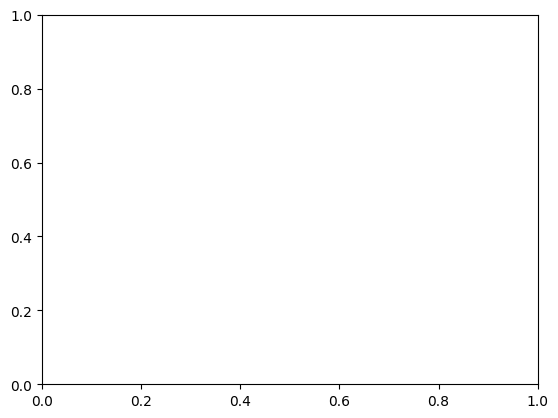

In [7]:
# def Branch_inp(Func,x,k,diff_fun_size, sensors_point):

#   X=np.linspace(-1,1,sensors_point)
#   K=np.linspace(1,10,diff_fun_size)
#   Branch_inp=np.zeros((diff_fun_size,sensors_point))

#   func_callable = sm.lambdify([x, k], Func)

#   for i in range (diff_fun_size):
#     function=Branch_inp[i][0]
#     for j in range (sensors_point):
#       Branch_inp[i][j]=func_callable(X[j],K[i])
#   return Branch_inp

# x,k =sm.symbols('x k')
# # func = k * sm.cos(k * x)




def generate_dataset(size, k_values, x_values, sigma):
    dataset = np.zeros((len(k_values), len(x_values)))

    for i, k in enumerate(k_values):
        for j, x in enumerate(x_values):
            func =  k*sm.sin(k*x) + k*x + k*sm.cos(k*x)
            gaussian_field = generate_gaussian_random_field(size, sigma)
            dataset[i][j] = func.evalf(subs={x: gaussian_field})

    return dataset

def generate_gaussian_random_field(size, sigma):
    random_values = np.random.randn(size, size)
    random_values *= sigma
    fft_values = np.fft.fft2(random_values)
    fft_values = np.fft.fftshift(fft_values)
    inverse_fft = np.fft.ifft2(fft_values)
    gaussian_field = np.real(inverse_fft)
    return gaussian_field

# Define the parameters
size = 100  # Size of the random field
sigma = 1.0  # Standard deviation
k_values = np.linspace(1, 10, 150)  # Values of K
x_values = np.linspace(-1, 1, 100)  # Values of x
# func =  k*sm.sin(k*x)
x,k =sm.symbols('x k')
# dataset=Branch_inp(func, x, k, 150, 100)
# Generate the dataset
dataset = generate_dataset(size, k_values, x_values, sigma)

dataset = np.repeat(dataset,100, axis=0)



[-1.30116868 -1.25299249 -1.20470481 -1.1563171  -1.10784086 -1.05928763
 -1.01066898 -0.96199651 -0.91328184 -0.8645366  -0.81577245 -0.76700103
 -0.71823401 -0.66948305 -0.62075979 -0.57207588 -0.52344294 -0.47487257
 -0.42637635 -0.37796583 -0.32965252 -0.2814479  -0.23336338 -0.18541035
 -0.13760014 -0.089944   -0.04245316  0.00486127  0.05198821  0.09891667
  0.14563574  0.19213462  0.23840255  0.28442892  0.33020316  0.37571486
  0.42095368  0.46590941  0.51057193  0.55493127  0.59897758  0.64270111
  0.68609227  0.7291416   0.77183977  0.8141776   0.85614606  0.89773626
  0.93893948  0.97974714  1.02015083  1.06014232  1.09971352  1.13885654
  1.17756363  1.21582725  1.25364002  1.29099477  1.32788449  1.36430236
  1.40024178  1.43569631  1.47065974  1.50512604  1.53908939  1.57254417
  1.60548498  1.63790661  1.66980407  1.70117261  1.73200765  1.76230486
  1.79206011  1.82126952  1.8499294   1.87803631  1.90558701  1.9325785
  1.95900803  1.98487304  2.01017122  2.03490049  2.

<function matplotlib.pyplot.show(close=None, block=None)>

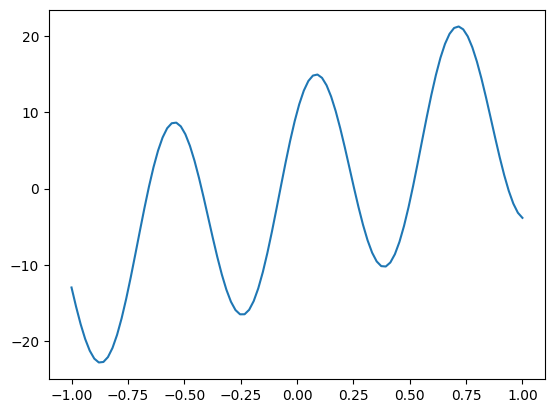

In [13]:
print(dataset[0])
print(len(k_values))
plt.plot(x_values, dataset[-1])
plt.show

In [18]:
import numpy as np
import sympy as sm

def discretize_branch_inp(Func, x, k, diff_fun_size, sensors_point, variance, correlation_length):
    X = np.linspace(-1, 1, sensors_point)
    K = np.linspace(1, 10, diff_fun_size)
    Branch_inp = np.zeros((diff_fun_size, sensors_point))

    func_callable = sm.lambdify([x, k], Func)

    for i in range(diff_fun_size):
        for j in range(sensors_point):
            f_true_mean = func_callable(X[j], K[i])
            cov_matrix = np.exp(-0.5 * ((X - X[j]) / correlation_length)**2)
            cov_matrix += 1e-8 * np.eye(sensors_point)
            f_samples = np.random.multivariate_normal(np.zeros(sensors_point), variance * cov_matrix)
            Branch_inp[i][j] = f_true_mean + f_samples[j]

    return Branch_inp

# Example usage
x, k = sm.symbols('x k')
Func = k * sm.cos(k * x)
diff_fun_size = 10
sensors_point = 100
variance = 0.1
correlation_length = 0.2

Branch_inp = discretize_branch_inp(Func, x, k, diff_fun_size, sensors_point, variance, correlation_length)

# Print the discretized Branch_inp matrix
print(Branch_inp)


ValueError: ignored

In [3]:
def Trunk_inp(Y_arr,trunk_size):

  Out=np.zeros((trunk_size,1))
  for i in range(trunk_size):
    Out[i][0]=Y_arr[i]
  return Out


trunk_size=100
Y=np.linspace(-1,1,trunk_size)
T_inp=Trunk_inp(Y,trunk_size)
T_inp =np.tile(T_inp[:], (150, 1))
# print(T_inp[5][0])

In [5]:
#  G(u(x))-->v(x)
 #Taking input as a ODE function So..
 # Our output will be sin(x):

def Out_func(func,x,k,T_inp,k_values,trunk_size):
  # dataset = np.zeros((len(k_values), 1))
  dataset=[]
  # T_inp=np.transpose(T_inp)


  func_callable = sm.lambdify([x, k], func)

  for i in range (len(k_values)):
    for j in range (trunk_size):
      _k_val = k_values[i]
      _t_inp = T_inp[j][0]

      dataset.append( func_callable(_t_inp,_k_val) )


  return np.transpose(dataset)

x,k=sm.symbols('x k')
func=sm.cos(k*x) - sm.sin(k*x) + k

Output=Out_func(func,x,k,T_inp,k_values,trunk_size)
print(Output.shape)


(15000,)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 40)           80          ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 40)           4040        ['input_1[0][0]']                
                                                                                            

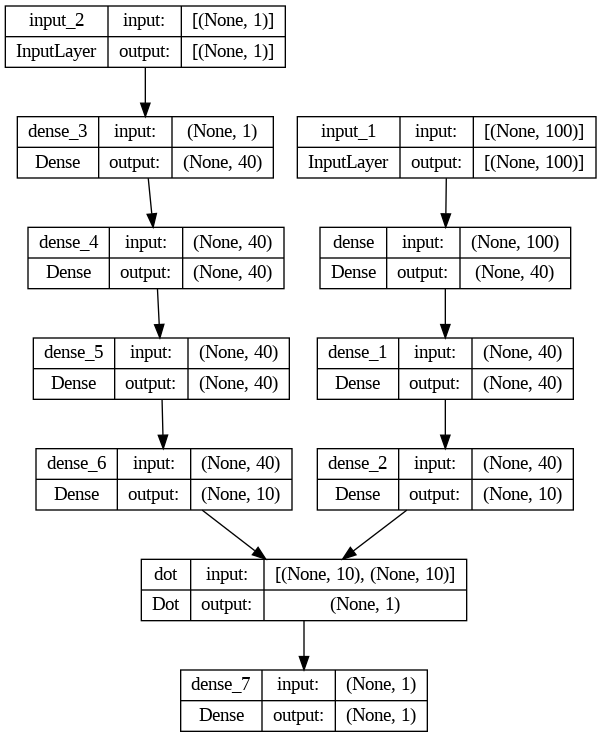

In [6]:


# MODEL ARCHITECTURE FOR FIRST FUNCTION
input_1 = tf.keras.layers.Input(shape=(100,))
hidden_1 = tf.keras.layers.Dense(40, activation='tanh')(input_1)
hidden_1a = tf.keras.layers.Dense(40, activation='tanh')(hidden_1)
output_1 = tf.keras.layers.Dense(10)(hidden_1a)
model_1 = tf.keras.models.Model(inputs=input_1, outputs=output_1)

# MODEL ARCHITECTURE FOR SECOND FUNCTION
input_2 = tf.keras.layers.Input(shape=(1,))
hidden_2 = tf.keras.layers.Dense(40, activation='tanh')(input_2)
hidden_2a = tf.keras.layers.Dense(40, activation='tanh')(hidden_2)
hidden_2b = tf.keras.layers.Dense(40, activation='tanh')(hidden_2a)
output_2 = tf.keras.layers.Dense(10)(hidden_2b)
model_2 = tf.keras.models.Model(inputs=input_2, outputs=output_2)

# SUMMING THE MULTIPLIED OUTPUT ELEMENTS
combined_output = tf.keras.layers.Dot(axes=-1)([output_1, output_2])
# combined_output = tf.keras.layers.Multiply()([output_1, output_2])



# MODEL ARCHITECTURE FOR THE FINAL OUTPUT
final_output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=final_output)


# COMPLILING THE MODEL
model.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])


# TRAIN THE MODEL

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model.fit([dataset, T_inp], Output, epochs=100)

In [ ]:
import sympy as sm
K=8
func=K*sm.sin(K*x) + K*x + K*sm.cos(K*x)
func_callable = sm.lambdify([x], func)
inp=np.linspace(-1,1,100)
X=np.zeros((1,100))
for i in range(100):
  X[0][i]=func_callable(inp[i])
X=np.repeat(X,1000,axis=0)

T=np.linspace(-1,1,1000)
T_val=np.zeros((1000,1))
for i in range(1000):
  T_val[i][0]=T[i]


Func=sm.cos(K*x) + K - sm.sin(K*x)
Out=np.zeros((1000,1))
func_callable = sm.lambdify([x], Func)
for i in range(1000):
  Out[i][0]=func_callable(T_val[[i][0]])

print(X.shape)
print(T_val.shape)
print(Out.shape)


(1000, 100)
(1000, 1)
(1000, 1)


32/32 [==============================] - 0s 2ms/step


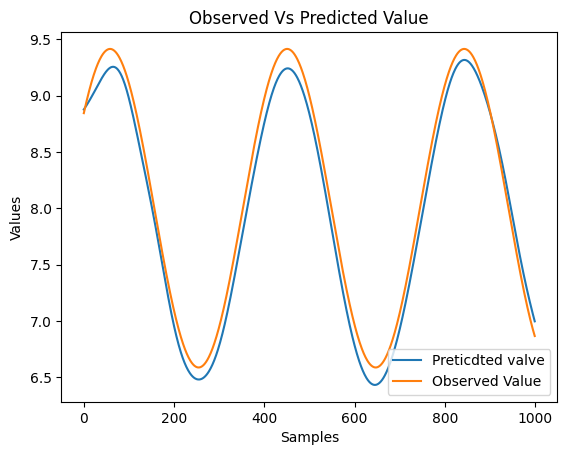

In [ ]:
plt.plot(model.predict([X, T_val]), label='Preticdted valve')
plt.plot(Out, label='Observed Value')
plt.title('Observed Vs Predicted Value')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()